In [1]:
# 1 read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [41]:
df = pd.read_csv('data.csv')
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [4]:
# 2 missing value
df.isnull()

,Name,Age,Sex
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [5]:
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

In [7]:
# 3 remove rows that have a missing value
df.shape

(891, 3)

In [8]:
df.dropna().shape

(704, 3)

In [10]:
# 4 complement missing values

# Note:
# list[['Clumn_Name']]: column
# list['Row_Name']: row
# list['Row_Name']['Column_Name']: cell
# describe(): main statistics

df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [11]:
# fillna with 0
df[['Age']].fillna(0).tail()

,Age
886,27.0
887,19.0
888,0.0
889,26.0
890,32.0


In [12]:
# fillna with mean
df[['Age']].fillna(int(df['Age'].mean())).tail()

,Age
886,27.0
887,19.0
888,29.0
889,26.0
890,32.0


In [13]:
# fillna with median( 50% value)
df[['Age']].fillna(int(df['Age'].median())).tail()

,Age
886,27.0
887,19.0
888,28.0
889,26.0
890,32.0


In [15]:
# 5 complement with a random num
mean = df['Age'].mean()
std = df['Age'].std()
num = df['Age'].isnull().sum()

In [32]:
rand1 = np.random.randint(mean-std, mean+std, size=num)

# rand2 affects original data distribution
# with the normal distribution based on the data set
rand2 = np.random.normal(loc=mean, scale=std, size=num)
# How to cast float list into integer list( 3 ways)
# rand2 = list(map(int, rand2))
# rand2 = [round(r) for r in rand2]
rand2 = np.array(rand2, int)
rand2

array([ 23,  30,  16,  37,  46,  53,  47,  16,  43,  22,  37,  38,  30,
        12,  27,  29,  22,  26,  13,  42,  22,  33,  20,  36,  32,  34,
        49,  11,  50,  51,  33,  31,  39,  12,  45,  21,  14,  53,   8,
        38,  25,  45,  19,  30,  31,  45,   6,  20,   3,  45,  17,  22,
        37,  24,  48,  33,  32,  30,  56,  51,  27,  43,  47,  12,  33,
        32,  21,  33,  43,  28,  36,  29,  26,  23,  23,  15,  54,  21,
        23,  35,  29,  29,  53,  50,  42,  19,  26,  48,  20,  59,  49,
        46,  22,  41,  39,  23,  11,  26,  21,  38,  17,  -8,  56,  43,
        47,  52,  24,  38,  18,   0,  22,  33,  38,  -6,  39,  16,  32,
        51,  34,  13,  44,  28,  18,  30,  49,  26,  23,  11,  35,  16,
        46,  28,  22,  41,  10,  16,  14,  20,  24,  51,  45,  35,  22,
        46,  41,  32,  11,  31,  34,  18,  38,  18,  26,  30,  47,  18,
        54,  16,  27,  32,  14,  41, -10,  31,  28,  49,  23, -13,  21,
        43,  14,  15,  31,  49,  36,  23,  32])

<AxesSubplot:>

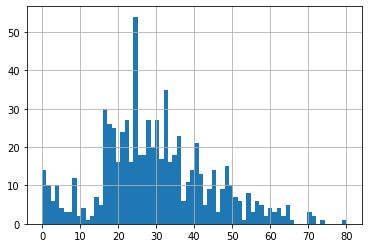

In [33]:
# 6 compementaion and comparison before data and after data
df['Age'].dropna().astype(int).hist(bins=70)

In [34]:
# conditional extraction
df['Age'][df['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [42]:
df['Age'][df['Age'].isnull()] = rand1
df['Age'].isnull().sum()

<ipython-input-42-bb5afa11d216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = rand1


0

<AxesSubplot:>

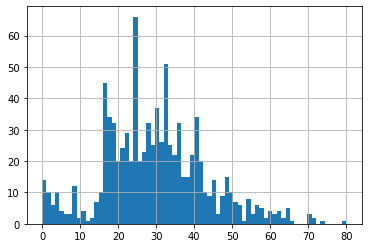

In [43]:
df['Age'].dropna().astype(int).hist(bins=70)

In [46]:
# 7 complementation with forward value
df[['Sex']].fillna(method='ffill').head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [47]:
# 8 dummy expression
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,0,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [49]:
pd.get_dummies(df['Sex']).drop('male', axis=1)

,female
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [53]:
# 9 min-max scaling
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=fbb7819bb1c9d2e59cbafa2f2e9958e133b8ccbafa75c1ca36de4de702b93e7f
  Stored in directory: c:\users\ytonomura\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [54]:
mmscaler = MinMaxScaler(copy=True)

In [55]:
lim_min, lim_max = df['Age'].min(), df['Age'].max()

In [56]:
lim_min, lim_max

(0.42, 80.0)

In [58]:
np.array([lim_min, lim_max]).reshape(-1,1)

array([[ 0.42],
       [80.  ]])

In [59]:
# config
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1,1))

MinMaxScaler()

In [63]:
# scaling
mmscaler.transform(df[['Age']])[:10]

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.2083438 ],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589]])

In [64]:
mmscaler.transform(df[['Age']]).min()

0.0

In [65]:
mmscaler.transform(df[['Age']]).max()

1.0

In [67]:
# 10 standardization( mean: 0, std: 1)
from sklearn.preprocessing import StandardScaler

In [68]:
ss = StandardScaler()

In [70]:
ss.fit_transform(df[['Age']])[:10]

array([[-0.57179525],
       [ 0.61212803],
       [-0.27581443],
       [ 0.39014242],
       [ 0.39014242],
       [-0.94177128],
       [ 1.79605132],
       [-2.05169936],
       [-0.20181922],
       [-1.16375689]])

In [71]:
ss.fit_transform(df[['Age']]).mean()

5.582266161976096e-17

In [72]:
ss.fit_transform(df[['Age']]).std()

0.9999999999999999

In [74]:
# 11 Principal component analysis
df_wine = pd.read_csv('wine.csv')

In [75]:
# class: output variable, Objective variable
# other than class: input variable, Explanatory variable
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [77]:
# standardized other than class
_dfs = ss.fit_transform(df_wine.iloc[:, 1:])

In [78]:
dfs = pd.DataFrame(_dfs, columns=df_wine.columns[1:])
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [79]:
# 12 PCA
from sklearn.decomposition import PCA

In [81]:
pca = PCA()
pca.fit(dfs)

PCA()

In [87]:
# map to pca space
feature = pca.transform(dfs)

In [83]:
# generate column names
[f'PC{x + 1}' for x in range(len(dfs.columns))]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

In [92]:
feature = pd.DataFrame(feature, columns=[f'PC{x + 1}' for x in range(len(dfs.columns))])
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


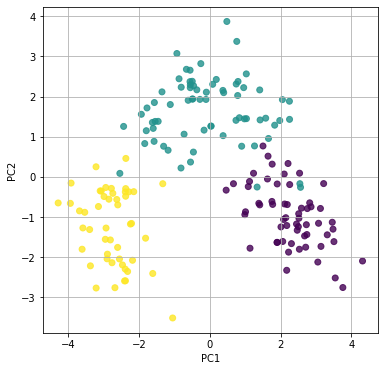

In [93]:
# 13 plot
plt.figure(figsize=(6, 6))
plt.scatter(feature['PC1'], feature['PC2'], alpha=0.8, c=df_wine['class'])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [94]:
# 14 logistic regression
# training, test, validation
from sklearn.model_selection import train_test_split

In [95]:
# input
X = feature.iloc[:, :2]

In [96]:
# output
y = df_wine.iloc[:, 0]

In [103]:
# split 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train

,PC1,PC2
42,3.070807,-1.155919
67,0.183384,2.427146
31,2.677411,-1.471874
141,-2.286561,-0.372508
5,3.050254,-2.122401
...,...,...
21,1.086570,-0.241744
0,3.316751,-1.443463
131,-2.384501,-0.374583
152,-1.812541,-1.527646


In [99]:
# 15 logistic regression( train a model)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [100]:
# 16 evaluate arruracy score
from sklearn.metrics import accuracy_score

In [101]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 3], dtype=int64)

In [104]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9166666666666666

In [105]:
# 17 k-means
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knc = KNeighborsClassifier(n_neighbors=40)
knc.fit(X_train, y_train)

score = knc.score(X_test, y_test)
score

0.9444444444444444

In [108]:
knc.predict(X_test)

array([1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 2], dtype=int64)

In [110]:
# How to impove accuracy of prediction in ML
# 1. commit preprocessing
# 2. change analysis way
# 3. modify hyper parameter

In [111]:
# 18 Multiple regression analysis
df_slump = pd.read_csv('slump.csv')
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [112]:
X = df_slump.iloc[:, :-1]
y = df_slump.iloc[:, -1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [114]:
# 19 Multiple regression analysis( tain a model)
from sklearn.linear_model import LinearRegression

In [115]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [117]:
# 20 Multiple regression analysis( metrics: a method of measuring something)
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
y_pred = regressor.predict(X_test)

In [119]:
# Coefficient of determination
r2_score(y_test, y_pred)

0.8343195909006844

In [120]:
# Mean squared error
mean_squared_error(y_test, y_pred)

9.390614418464372

In [121]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.064410941512964